In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_style('whitegrid')

In [141]:
n = 30
r = 957
s2 = 46.02

In [142]:
1-stats.chi2(df=n-1).cdf(n*(n-1)*s2/r)

0.058088964649928854

In [148]:
samples = np.random.multinomial(n=r, pvals=np.ones(n)/n, size=100000)

In [149]:
def t_stat(xs):
    means = xs.mean(1)
    return ((xs.T - means)**2).sum(0) / means

In [150]:
t_obs = n*(n-1)*s2/r

In [151]:
t_obs

41.836363636363636

In [152]:
(t_stat(samples) > t_obs).mean()

0.05788

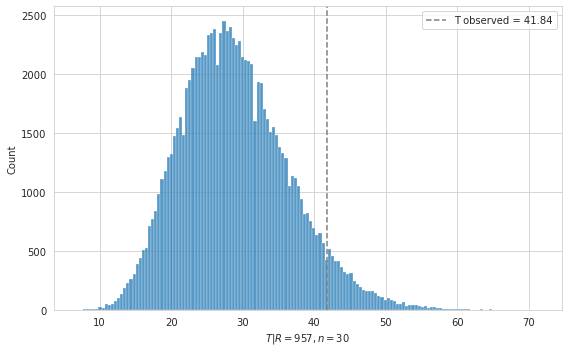

In [153]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(t_stat(samples), ax=ax)
ax.axvline(t_obs, color='grey', linestyle='--', label=f'T observed = {t_obs:.2f}')

ax.set_xlabel('$T|R=957, n=30$')
ax.legend(loc='best')

fig.tight_layout()
fig.show()

In [229]:
np.random.seed(32424)

n = 100
zs = np.random.poisson(lam=0.1, size=n)

r, s2 = zs.sum(), ((zs-zs.mean())**2).sum()/(n-1)

In [230]:
t_obs = n*(n-1)*s2/r
t_obs

91.00000000000003

In [231]:
1-stats.chi2(df=n-1).cdf(t_obs)

0.7043271839237975

In [232]:
samples = np.random.multinomial(n=r, pvals=np.ones(n)/n, size=10000)
(t_stat(samples) > t_obs).mean()

0.6142

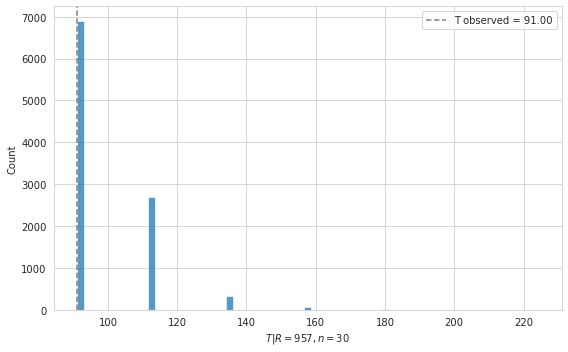

In [233]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(t_stat(samples), ax=ax)
ax.axvline(t_obs, color='grey', linestyle='--', label=f'T observed = {t_obs:.2f}')

ax.set_xlabel('$T|R=957, n=30$')
ax.legend(loc='best')

fig.tight_layout()
fig.show()